# 1.22.1

1. In Section 1.12.1.2, the reader was reminded that the results of a cross- validation are random, due to the random partitioning into training and test sets. Try doing several runs of the linear and k-NN code in that section, comparing results.


#### load data

In [55]:
library(freqparcoord)

In [56]:
data(mlb)

In [57]:
head(mlb)

Name,Team,Position,Height,Weight,Age,PosCategory
Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder
Brian_Roberts,BAL,Second_Baseman,69,176,29.39,Infielder


#### cross-validation

In [72]:
xvalpart <- function(data, p){
    n <- nrow(data)
    ntrain <- round(p*n)
    trainidxs <- sample(1:n, ntrain, replace = FALSE)
    list(train = data[trainidxs,],
        valid = data[-trainidxs,])
}

#### linear model

In [64]:
xvallm <- function(data, ycol, predvars, p, meanabs=TRUE){
    tmp <- xvalpart(data, p)
    train <- tmp$train
    valid <- tmp$valid
    trainy <- train[,ycol]
    trainpreds <- train[,predvars]
    trainpreds <- as.matrix(trainpreds)
    lmout <- lm(trainy ~ trainpreds)
    validpreds <- as.matrix(valid[,predvars])
    predy <- cbind(1, validpreds)%*%coef(lmout)
    realy <- valid[,ycol]
    if(meanabs) return (mean(abs(predy - realy)))
    list(predy = predy, realy = realy)

}

In [65]:
xvallm(mlb, 5, c(4,6), 2/3)

[1] 13.99525

I run the code above for several times, and the results are below, they are pretty much close to the same value, but slightly different.

13.8709363751334

13.3936339425929

13.5901466113105

13.9952486708203

#### k-NN

In [78]:
xvalknn <- function(data, ycol, predvars, k, p, meanabs=TRUE){
    data <- data[,c(predvars, ycol)]
    ycol <- length(predvars) +1
    tmp <- xvalpart(data, p)
    train <- tmp$train
    valid <- tmp$valid
    valid <- as.matrix(valid)
    xd <- preprocessx(train[,-ycol],k)
    kout <- knnest(train[,ycol], xd, k)
    predy <- predict(kout, valid[,-ycol], TRUE)
    realy <- valid[,ycol]
    if(meanabs) return(mean(abs(predy - realy)))
    list(predy = predy, realy = realy)
}

In [79]:
library(regtools)
#set.seed(9999)
xvalknn(mlb, 5, c(4, 6), 25, 2/3)

[1] 14.16343

I also run the k-NN for several times, and get the results, they are also very close to each other:

14.3281656804734

14.1320710059172

13.7398816568047

14.1634319526627

# 1.22.2

Extend (1.28) to include interaction terms for age and gender, and age2 and gender. Run the new model, and find the estimated effect of being female, for a 32-year-old person with a Master’s degree.

In [44]:
library(freqparcoord)
data(prgeng)
prgeng$age2 <- prgeng$age^2
edu <- prgeng$educ
prgeng$ms <- as.integer(edu == 14)
prgeng$phd <- as.integer(edu == 16)
prgeng$fem <- prgeng$sex - 1
prgeng$agegender <- prgeng$age * prgeng$fem
prgeng$age2gender <- prgeng$age2 * prgeng$fem
tmp <- prgeng[edu >= 13,]
pe <- tmp[ ,c(1 ,12 ,9 ,13 ,14 ,15 ,8)]
pe <- as.matrix(pe)

since from "a 32-year-old person with a Master’s degree" I don't know the value of wkswrkd, I just exclude this variable from the model 

In [45]:
lmout = lm(wageinc ~ age+age2+ms+phd+fem+agegender+age2gender , data=prgeng )

In [46]:
lmout


Call:
lm(formula = wageinc ~ age + age2 + ms + phd + fem + agegender + 
    age2gender, data = prgeng)

Coefficients:
(Intercept)          age         age2           ms          phd          fem  
  -96569.95      7423.08       -81.34     16118.22     25109.31     39508.63  
  agegender   age2gender  
   -2632.34        29.92  


In [48]:
predict(lmout, data.frame(age = 32, fem = 1, age2 = 32*32, ms = 1, phd = 0, agegender = 32*1, age2gender = 32*32*1))

1 
59708.15

In [51]:
# another method to calculate the output: coef(lmout) %*% c(32, 32*32, 1, 0, 1, 32*1, 32*32*1)

# 1.22.3

Consider the bodyfat data mentioned in Section 1.2. Use lm() to form a prediction equation for density from the other variables (skipping the first three), and comment on whether use of indirect methods in this way seems feasible.

In [53]:
library(mfp)
data(bodyfat)
head(bodyfat)
model = lm(density ~ age + weight + height + neck + chest + abdomen + hip + thigh + knee + ankle + biceps + forearm + wrist, data = bodyfat)
summary(model)

Loading required package: survival


case,brozek,siri,density,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
1,12.6,12.3,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,6.1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,25.3,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,10.4,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,28.7,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,20.9,1.0502,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8



Call:
lm(formula = density ~ age + weight + height + neck + chest + 
    abdomen + hip + thigh + knee + ankle + biceps + forearm + 
    wrist, data = bodyfat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.021527 -0.007717  0.000096  0.006491  0.034114 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.139e+00  4.030e-02  28.248  < 2e-16 ***
age         -1.203e-04  7.515e-05  -1.601  0.11062    
weight       2.395e-04  1.243e-04   1.926  0.05528 .  
height       1.498e-04  2.230e-04   0.672  0.50243    
neck         1.075e-03  5.401e-04   1.991  0.04765 *  
chest        1.232e-04  2.303e-04   0.535  0.59339    
abdomen     -2.277e-03  2.008e-04 -11.335  < 2e-16 ***
hip          5.513e-04  3.390e-04   1.626  0.10521    
thigh       -6.149e-04  3.354e-04  -1.833  0.06799 .  
knee        -4.844e-05  5.622e-04  -0.086  0.93141    
ankle       -6.314e-04  5.145e-04  -1.227  0.22094    
biceps      -5.755e-04  3.976e-04  -1.448  0.14907 

# 1.22.4

In Section 1.19.5.2, we gave this intuitive explanation:
In other words, the national mean height is a weighted average of the state means, with the weight for each state being its proportion of the national population. Replace state by gender in the following.
(a) Write English prose that relates the overall mean height of people and the gender-specific mean heights.
(b) Write English prose that relates the overall proportion of people taller than 70 inches to the gender-specific proportions.


My answer: a) the overall mean height is the sum of mean height of male multiplied by the weight of male in the population, and mean height of female multiplied by the weight of female in the population.

b) The overall proportion of people taller than 70 inches is the sum of weighted average of proportion of male taller than 70 inches and female taller than 70 inches.

# 2.14.1

Consider the census data in Section 1.16.1.
(a) Form an approximate 95% confidence interval for β6 in the model (1.28).
(b) Form an approximate 95% confidence interval for the gender effect for Master’s degree holders, β6 + β7, in the model (1.28).

In [83]:
data(prgeng)
prgeng$age2 <- prgeng$age^2
edu <- prgeng$educ
prgeng$ms <- as.integer(edu == 14)
prgeng$phd <- as.integer(edu == 16)
prgeng$fem <- prgeng$sex-1
tmp <- prgeng[edu >= 13,]
pe_subset <- tmp[,c(1,12,9,13,14,15,8)]
pe_subset$msfem <- pe_subset$ms * pe_subset$fem
model = lm(wageinc ~., data = pe_subset)
sum_model <- summary(model)
b6 <- sum_model$coefficients['fem',]
b7 <- sum_model$coefficients['msfem',]
tval <- qt(0.975, nrow(prgeng)-1)
b6_u <- b6[1] + tval*b6[2]
b6_l <- b6[1] - tval*b6[2]
b7_u <- b7[1] + tval*b7[2]
b7_l <- b7[1] - tval*b7[2]
sprintf('a) The 95 percent confidence interval for beta6 is [%f , %f]', b6_l, b6_u)
sprintf('b) The 95 percent confidence interval for beta6+beta7 is [%f, %f]', b6_l +b7_l, b6_u + b7_u)

[1] "a) The 95 percent confidence interval for beta6 is [-11985.158126 , -7697.500554]"

[1] "b) The 95 percent confidence interval for beta6+beta7 is [-20164.329247, -8191.824516]"

# 2.14.2

The full bikeshare dataset spans 3 years’ time. Our analyses here have only used the first year. Extend the analysis in Section 2.8.5 to the full data set, adding dummy variables indicating the second and third year. Form an approximate 95% confidence interval for the difference between the coefficients of these two dummies.

In [87]:
day <- read.csv('MLDatasets/Bike-Sharing-Dataset/day.csv')
day$temp2 <- day$temp^2
day$clearday <- as.integer(day$weathersit == 1)
bike <- lm(registered ~ temp + temp2 + workingday + clearday + yr, data = day)
bike_summ <- summary(bike)
t_value <- qt(0.975, nrow(day)-1)
yr <- bike_summ$coefficients['yr',]
yr_l <- yr[1] - t_value * yr[2]
yr_h <- yr[1] + t_value * yr[2]

sprintf('The 95 percent confidence interval for beta6 is [%f,  %f]', yr_l, yr_h)

[1] "The 95 percent confidence interval for beta6 is [1604.972618,  1827.537189]"

# 2.14.3

Suppose we are studying growth patterns in children, at k particular ages. Denote the height of the ith child in our sample data at age j by Hij, with Hi = (Hi1,...,Hik)′ denoting the data for child i. Suppose the population distribution of each Hi is k-variate normal with mean vector μ and covariance matrix Σ. Say we are interested in successive differences in heights,Dij =Hi,j+1−Hij, j=1,2,...,k−1. DefineDi =(Di1,...,Dik)′. Explain why each Di is (k−1)-variate normal, and derive matrix expressions for the mean vector and covariance matrices.

# 2.14.4

In the simulation in Section 2.9.3, it is claimed that ρ2 = 0.50. Confirm this through derivation.

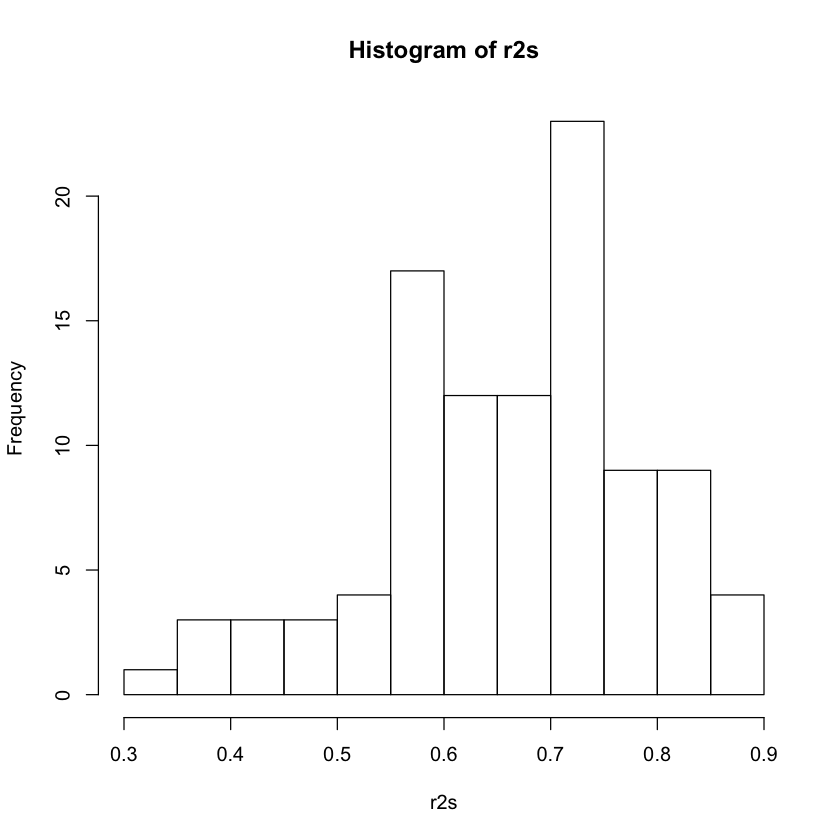

In [95]:
simr2 <- function (n, p , nreps) { 
    r2s <- vector(length=nreps) 
    for (i in 1:nreps) {
    x <- matrix(rnorm(n*p),ncol=p)
    y <- x %*% rep(1,p) + rnorm(n,sd=sqrt(p)) 
    r2s[i] <- getr2(x,y)
    }
    hist (r2s) 
}

getr2 <- function(x,y) {
    smm <- summary(lm(y ~ x)) 
    smm$r.squared
}

simr2(25, 8, 100)